# Practice Exercise: Apriori Algorithm

## Scenario:
You are analyzing a dataset of transactions in a grocery store. Your goal is to:
1. Identify frequent itemsets.
2. Generate association rules.

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

## Data:
transactions = pd.DataFrame([
    ['Eggs', 'Bread', 'Butter'],
    ['Eggs', 'Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Eggs', 'Butter'],
    ['Milk', 'Bread', 'Butter', 'Jam']
], columns=['Item1', 'Item2', 'Item3', 'Item4'])

transactions

,Item1,Item2,Item3,Item4
0,Eggs,Bread,Butter,None
1,Eggs,Bread,None,None
2,Milk,Bread,Butter,None
3,Eggs,Butter,None,None
4,Milk,Bread,Butter,Jam


In [3]:
# Clean the data to create the one hot
one_hot = pd.get_dummies(transactions.apply(pd.Series).stack()).groupby(level = 0).sum()
one_hot

,Bread,Butter,Eggs,Jam,Milk
0,1,1,1,0,0
1,1,0,1,0,0
2,1,1,0,0,1
3,0,1,1,0,0
4,1,1,0,1,1


In [4]:
# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(one_hot, min_support = 0.5, use_colnames = True)
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


c:\Users\SABIO\Documents\GitHub\Personal-Projects\myenv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.8,(Bread)
1,0.8,(Butter)
2,0.6,(Eggs)
3,0.6,"(Butter, Bread)"


In [5]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.7)
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Butter),(Bread),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
1,(Bread),(Butter),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75


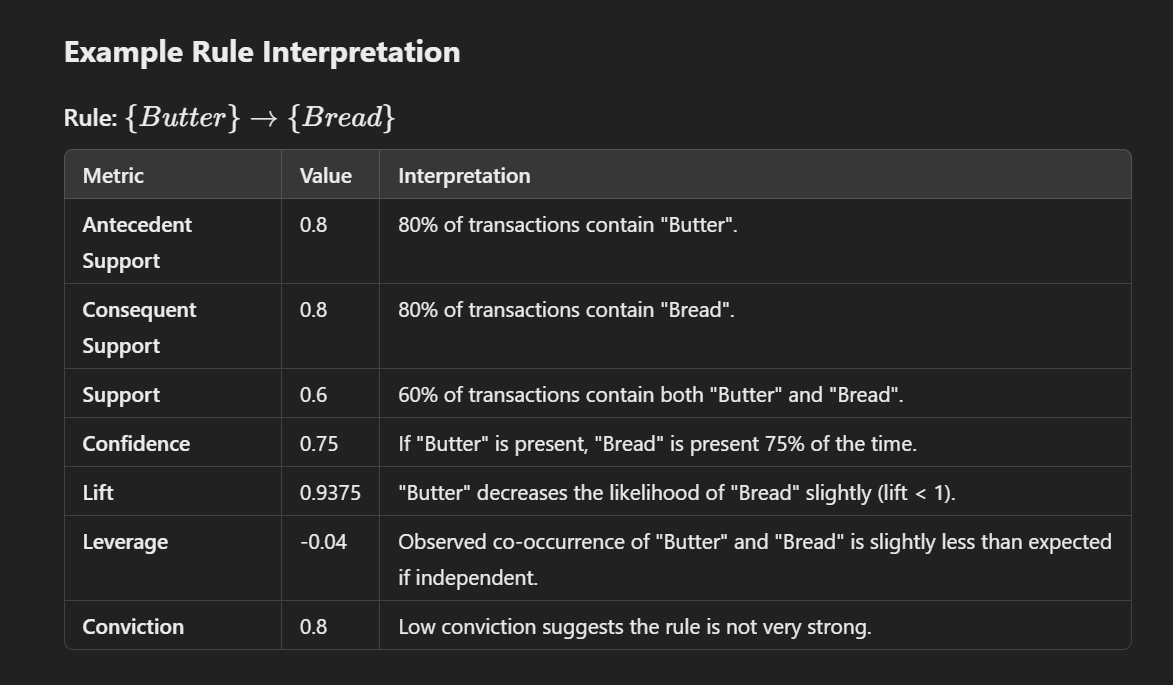

In [6]:
import plotly.express as px

# Filter necessary metrics for visualization
visualization_data = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
visualization_data['rule'] = visualization_data['antecedents'].astype(str) + " → " + visualization_data['consequents'].astype(str)

# Plot
fig = px.bar(
    visualization_data,
    x='rule',
    y=['support', 'confidence', 'lift'],
    title="Association Rule Metrics",
    labels={"value": "Metric Value", "variable": "Metric", "rule": "Rule"},
    template="plotly_dark",
    barmode='group'
)
fig.show()


# Understanding the Association Rules Table

## Key Metrics:
1. **Antecedents**:
   - The "if" part of the rule (A).
2. **Consequents**:
   - The "then" part of the rule (B).
3. **Antecedent Support**:
   - Proportion of transactions containing the antecedent (A).
4. **Consequent Support**:
   - Proportion of transactions containing the consequent (B).
5. **Support**:
   - Proportion of transactions containing both A and B.
6. **Confidence**:
   - Probability of B occurring given A.
   - Formula: Support(A ∪ B) / Support(A)
7. **Lift**:
   - Measures the strength of the rule compared to random chance.
   - Lift > 1: A increases the likelihood of B.
   - Lift < 1: A decreases the likelihood of B.
8. **Leverage**:
   - Difference between observed co-occurrence and expected co-occurrence.
9. **Conviction**:
   - Degree to which the absence of B invalidates the rule.